<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/SubhajitBasistha_M4_NB_MiniProject_2_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1259 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:

- Without Mask/ With Mask/ Partial Mask

Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip
!unzip -qq MP2_FaceMask_Dataset.zip
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Import Required packages

In [ ]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import glob, os
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

## Data Loading and preprocessing (2 points)

### Analyze the shape of images and distribution of classes

In [ ]:
# YOUR CODE HERE
with_mask_samples = glob.glob("/content/MP2_FaceMask_Dataset/train/with_mask/*")

without_mask_samples = glob.glob("/content/MP2_FaceMask_Dataset/train/without_mask/*")

partial_mask_samples = glob.glob("/content/MP2_FaceMask_Dataset/train/partial_mask/*")

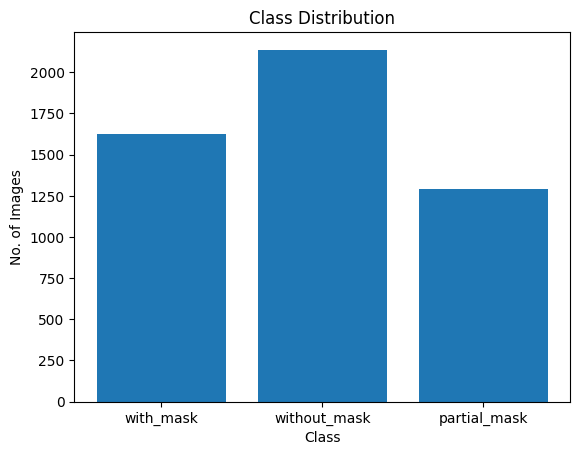

In [ ]:
# Count the number of samples in each class
class_counts = {
    "with_mask": len(with_mask_samples),
    "without_mask": len(without_mask_samples),
    "partial_mask": len(partial_mask_samples)
}

# Plot the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class")
plt.ylabel("No. of Images")
plt.title("Class Distribution")
plt.show()

**Counting the total no. of images in the dataset:**

In [ ]:
total_images = len(with_mask_samples) + len(without_mask_samples) + len(partial_mask_samples)
print("Total no. of images:", total_images)

Total no. of images: 5056


In [ ]:
import os
from PIL import Image

with_mask_dataset_path = "/content/MP2_FaceMask_Dataset/train/with_mask/"
without_mask_dataset_path = "/content/MP2_FaceMask_Dataset/train/without_mask/"
partial_mask_dataset_path = "/content/MP2_FaceMask_Dataset/train/partial_mask/"

all_images = []

# Iterating through the dataset directory and loading each with_mask image
for filename in os.listdir(with_mask_dataset_path):
    img_path = os.path.join(with_mask_dataset_path, filename)
    img = Image.open(img_path)
    all_images.append(img)

# Iterating through the dataset directory and loading each without_mask image
for filename in os.listdir(without_mask_dataset_path):
    img_path = os.path.join(without_mask_dataset_path, filename)
    img = Image.open(img_path)
    all_images.append(img)

# Iterating through the dataset directory and loading each partial_mask image
for filename in os.listdir(partial_mask_dataset_path):
    img_path = os.path.join(partial_mask_dataset_path, filename)
    img = Image.open(img_path)
    all_images.append(img)


In [ ]:
# Now we are using the 'all_images' list for further analysis
heights = [image.size[0] for image in all_images]  # Enumerating over all images from the dataset

max_height = max(heights)
min_height = min(heights)
avg_height = sum(heights) / len(heights)

print("Maximum height:", max_height)
print("Minimum height:", min_height)
print("Average height:", avg_height)

Maximum height: 3456
Minimum height: 110
Average height: 434.44026898734177


In [ ]:
widths = [image.size[1] for image in all_images]  # Enumerating over all images from the dataset

max_width = max(widths)
min_width = min(widths)
avg_width = sum(widths) / len(widths)

print("Maximum width:", max_width)
print("Minimum width:", min_width)
print("Average width:", avg_width)

Maximum width: 4608
Minimum width: 141
Average width: 449.3785601265823


### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://keras.io/api/preprocessing/image/)

In [ ]:
TRAINING_DIR = "/content/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/MP2_FaceMask_Dataset/test/"

**Creating Train Generator:**

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting the directory where the training images are stored
image_directory = TRAINING_DIR

# Instantiating the ImageDataGenerator
datagen_train = ImageDataGenerator(
    rescale=1./255,  # Scaling pixel values between 0 and 1
    rotation_range=40,  # Randomly rotating images by 40 degrees
    width_shift_range=0.1,  # Randomly shifting images horizontally by 10% of the width
    height_shift_range=0.1,  # Randomly shifting images vertically by 10% of the height
    shear_range=0.2,  # Applying shear transformation with intensity of 0.2
    zoom_range=0.2,  # Randomly ing images by 20%
    horizontal_flip=True,  # Randomly flipping images horizontally
    vertical_flip=False,  # Not flipping images vertically
    fill_mode='nearest'  # Filling in any newly created pixels after rotation or shifting
)

In [ ]:
# Using the `flow_from_directory` method to generate batches of data
train_generator = datagen_train.flow_from_directory(
    TRAINING_DIR,  # Directory containing the training images
    target_size=(224, 224),  # Desired image size
    batch_size=10,  # Batch size
    class_mode='categorical',  # Class mode, setting to 'categorical' for multi-class classification
    shuffle=True  # Shuffling the data
)


Found 5029 images belonging to 3 classes.


**Creating Valid Generator:**

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting the directory where the validation images are stored
image_directory = VALIDATION_DIR

# Instantiating the ImageDataGenerator
datagen_valid = ImageDataGenerator(
    rescale=1./255,  # Scaling pixel values between 0 and 1
    rotation_range=0,  # Randomly rotating images by 0 degree
    width_shift_range=0.1,  # Randomly shifting images horizontally by 10% of the width
    height_shift_range=0.1,  # Randomly shifting images vertically by 10% of the height
    shear_range=0.2,  # Applying shear transformation with intensity of 0.2
    zoom_range=0.2,  # Randomly zooming images by 20%
    horizontal_flip=True,  # Randomly flipping images horizontally
    vertical_flip=False,  # Not flipping images vertically
    fill_mode='nearest'  # Filling in any newly created pixels after rotation or shifting
)

In [ ]:
# Using the `flow_from_directory` method to generate batches of data
valid_generator = datagen_valid.flow_from_directory(
    VALIDATION_DIR,  # Directory containing the validation images
    target_size=(224, 224),  # Desired image size
    batch_size=50,  # Batch size
    class_mode='categorical',  # Class mode, set to 'categorical' for multi-class classification
    shuffle=True  # Shuffling the data
)


Found 1259 images belonging to 3 classes.


**Creating Test Generator:**

In [ ]:
test_generator = valid_generator # As the VALIDATION_DIR is composed of test images and 'valid_generator' is generated
                                 # out of VALIDATION_DIR

**Train Generator class_indices, Num_Unique_Classes, batch dimension and input_train_shape:**

In [ ]:
train_generator.class_indices

{'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}

In [ ]:
Num_Unique_Classes = train_generator.num_classes
print("Total No. of Unique classes:",Num_Unique_Classes)

Total No. of Unique classes: 3


In [ ]:
print("Train data gen batch dimension:",next(train_generator)[0].shape)

Train data gen batch dimension: (10, 224, 224, 3)


In [ ]:
input_train_shape = next(train_generator)[0].shape[1:]
print("input_train_shape of an image:",input_train_shape)

input_train_shape of an image: (224, 224, 3)


**Valid Generator class_indices, Num_Unique_Classes, batch dimension and input_validation_shape:**

In [ ]:
valid_generator.class_indices

{'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}

In [ ]:
Num_Unique_Classes = valid_generator.num_classes
print("Total No. of Unique classes:",Num_Unique_Classes)

Total No. of Unique classes: 3


In [ ]:
print("Validation data gen batch dimension:",next(valid_generator)[0].shape)

Validation data gen batch dimension: (50, 224, 224, 3)


In [ ]:
input_validation_shape = next(valid_generator)[0].shape[1:]
print("input_validation_shape of an image:",input_validation_shape)

input_validation_shape of an image: (224, 224, 3)


### Visualize the sample images of each class using data generator

Hint: plt.subplot

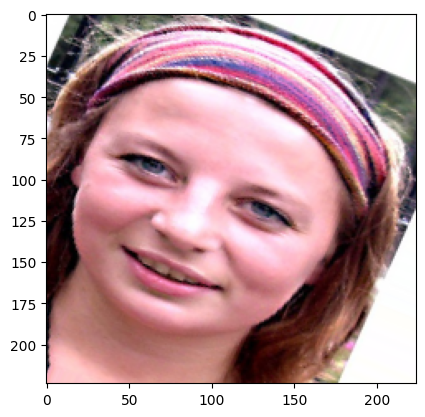

In [ ]:
# YOUR CODE HERE
plt.imshow(next(train_generator)[0][0]) # train_generator)[0][0] --> 1st [0] represents the input dimension (10,224,224,3)
# train_generator)[0][0] --> 2nd [0] represents 1st image sample of each batch
# Train data gen Batch size = 10, means there are 0 to 9 index of images in a batch
                                        # Then due to next() function, iterating 0-th index of image in 0-th batch
                                        # Then going to 0-th index of image in 1-th batch and so on till the end (502-th) batch

plt.imshow(next(train_generator)[0][1]) # train_generator)[0][1] --> 1st [0] represents the input dimension (10,224,224,3)
# train_generator)[0][1] --> 2nd [1] represents 2nd image sample of each batch
# Train data gen Batch size = 10, means there are 0 to 9 index of images in a batch
                                        # Then due to next() function, iterating 1-th index of image in 0-th batch
                                        # Then going to 1-th index of image in 1-th batch and so on till the end (502-th) batch

Length of one batch (no. of images in one batch): 10


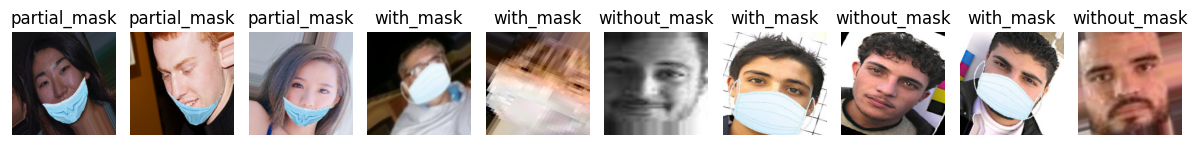

In [ ]:
import matplotlib.pyplot as plt

# Getting a batch of data from the generator
batch_images, batch_labels = train_generator.next()
print("Length of one batch (no. of images in one batch):",len(batch_images))
# Creating a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=batch_images.shape[0], figsize=(12, 4))

# Iterate through the images and labels
for i, (image, label) in enumerate(zip(batch_images, batch_labels)):
    # Get the class label name
    class_name = train_generator.class_indices
    class_name = [k for k, v in class_name.items() if v == label.argmax()][0]

    # Plot the image
    axes[i].imshow(image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

# Adjusting the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


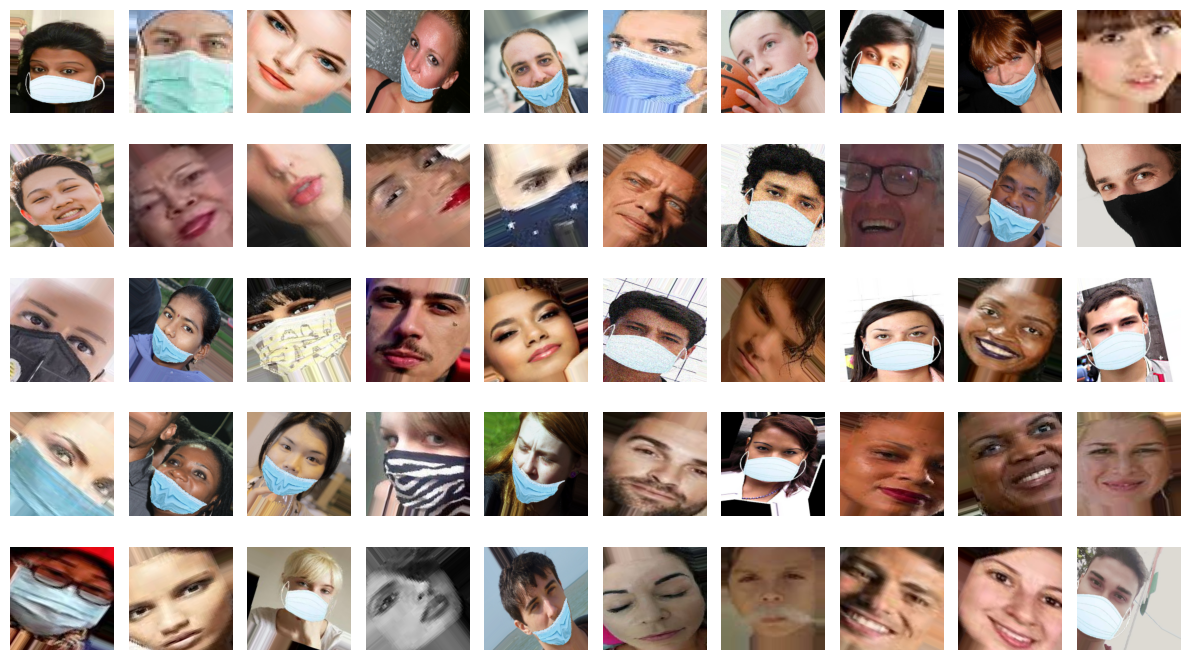

In [ ]:
# Total 5029 train images found in train_generator
# 1 batch contains 10 images as batch_size = 10
# So to accommodate all 5029 train images we need 509 rows and 10 columns in sub-plot
# It's a huge no. of sub-plots. So, we are reducing the sub-plot size to 5 rows and 10 columns
# So that, we can iterate over 50 no. of batches and taking 0-th image from each of the batches
# Creating a figure with subplots

fig = plt.figure(figsize=(12,7))
num_rows = 5
num_columns = 10

for image_index in range(1, num_rows*num_columns + 1):
    fig.add_subplot(num_rows, num_columns, image_index)
    plt.imshow(next(train_generator)[0][0]) # The 2nd [0] represents due to next() function, iterating 0-th index of image
                                            # in 0-th batch
                                            # Then going to 0-th index of image in 1-th batch and
                                            # so on till the 0-th index of image in 49-th batch [or (50-1)th batch]
    plt.axis('off')
# Adjusting the spacing between subplots
plt.tight_layout()
plt.show()

## Build the CNN model using Keras (4 points)



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

**Initialize the network of convolution, maxpooling and dense layers:**

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()

# Creating Convolution Layer 1
model.add(Conv2D(100, (3, 3), activation='relu', input_shape=input_train_shape))

# Creating MaxPooling for Convolution Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Creating Convolution Layer 2
model.add(Conv2D(100, (3, 3), activation='relu'))

# Creating MaxPooling for Convolution Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Creating Flatten Layer to get the inputs at the input layer of the Keras NN
model.add(Flatten())

# Adding a Dropout Layer after the input layer of the Keras NN
model.add(Dropout(0.5))

# Creating the Dense Layer or the 1st Hidden Layer
model.add(Dense(256, activation='relu'))

# Creating the Output Layer
model.add(Dense(Num_Unique_Classes, activation='softmax'))


**Define the optimizer and loss functions:**

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Creating the Model Summary:**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 100)     90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 291600)            0         
                                                                 
 dropout (Dropout)           (None, 291600)            0

**Fitting the Model:**

In [ ]:
# Define the number of epochs and batch size
epochs = 5
#batch_size = 32

# Fit the model on the training data
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator
)

Epoch 1/5
503/503 [==============================] - 2190s 4s/step - loss: 0.5697 - accuracy: 0.8214 - val_loss: 0.2796 - val_accuracy: 0.9150
Epoch 2/5
503/503 [==============================] - 2126s 4s/step - loss: 0.2985 - accuracy: 0.9026 - val_loss: 0.1879 - val_accuracy: 0.9468
Epoch 3/5
503/503 [==============================] - 2093s 4s/step - loss: 0.2299 - accuracy: 0.9240 - val_loss: 0.1796 - val_accuracy: 0.9412
Epoch 4/5
503/503 [==============================] - 2092s 4s/step - loss: 0.2612 - accuracy: 0.9161 - val_loss: 0.2151 - val_accuracy: 0.9468
Epoch 5/5
503/503 [==============================] - 2085s 4s/step - loss: 0.2112 - accuracy: 0.9399 - val_loss: 0.1384 - val_accuracy: 0.9635


**Plotting the training loss and validation loss versus epochs:**

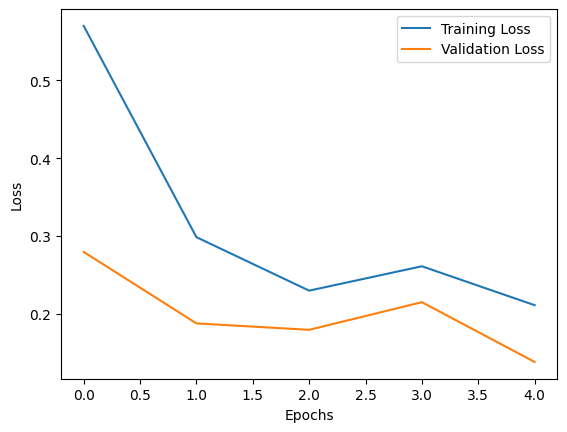

In [ ]:
# Plot the training loss and validation loss versus epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluating the Model:**

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

26/26 [==============================] - 125s 5s/step - loss: 0.1531 - accuracy: 0.9563
Test Loss: 0.15305231511592865
Test Accuracy: 0.9563145637512207


**Saving the trained CNN Model:**

In [ ]:
# Saving the VGG16 Trained Model:
# Save the model
model.save('/content/model_CNN.h5')

**Loading the trained CNN Model:**

In [ ]:
# Load the saved model
saved_model_CNN = load_model('/content/model_CNN.h5')

**Saving the History of trained CNN Model:**

In [ ]:
import pickle

# Save the history object
with open('history_CNN.pkl', 'wb') as file:
    pickle.dump(history.history, file)

**Loading the History object of trained CNN Model:**

In [ ]:
# Reloading the history object
with open('history_CNN.pkl', 'rb') as file:
    loaded_history_CNN = pickle.load(file)

# Accessing the training and validation metrics
train_loss_CNN = loaded_history_CNN['loss']
val_loss_CNN = loaded_history_CNN['val_loss']
train_acc_CNN = loaded_history_CNN['accuracy']
val_acc_CNN = loaded_history_CNN['val_accuracy']

**Plottiing the training loss and validation loss versus epochs from loaded_history_CNN:**

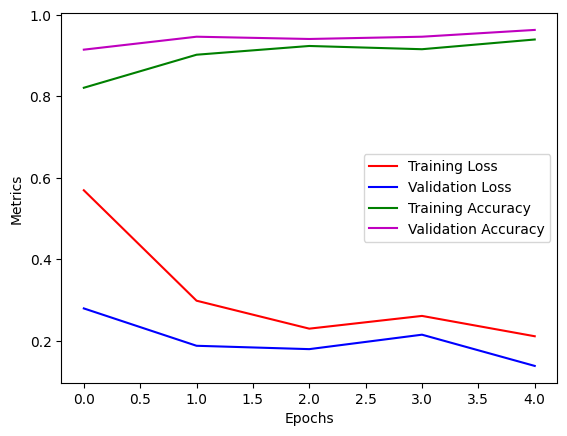

In [ ]:
# Plotting the training and validation metrics
plt.plot(train_loss_CNN, 'r', label='Training Loss')
plt.plot(val_loss_CNN, 'b', label='Validation Loss')
plt.plot(train_acc_CNN, 'g', label='Training Accuracy')
plt.plot(val_acc_CNN, 'm', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

**Evaluate the Trained CNN Model using saved_model_CNN:**

In [ ]:
# Evaluate the model on the test data
loss_CNN, accuracy_CNN = saved_model_CNN.evaluate(test_generator)
print("CNN Test Loss:", loss_CNN)
print("CNN Test Accuracy:", accuracy_CNN)

26/26 [==============================] - 122s 5s/step - loss: 0.1395 - accuracy: 0.9579
CNN Test Loss: 0.1395464539527893
CNN Test Accuracy: 0.9579030871391296


**Designing a deeper CNN Model:**

In [ ]:
model_deepCNN = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(input_train_shape)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(64, (2,2),activation='relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(128, (2,2),activation='relu'),
    MaxPooling2D(pool_size = (2,2)),

    Flatten(),
    Dropout(0.5),
    Dense(1920, activation='relu'),
    Dense(480, activation='relu'),
    Dense(32, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

**Deep CNN Model: Defining the optimizer and loss functions:**

In [ ]:
model_deepCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Deep CNN Model: Creating the Model Summary:**

In [ ]:
model_deepCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 53, 53, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 64)      

**Deep CNN Model: Fitting the Model**

In [ ]:
epochs = 5
history_deepCNN = model_deepCNN.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator
)

Epoch 1/5
503/503 [==============================] - 735s 1s/step - loss: 0.3925 - accuracy: 0.8489 - val_loss: 0.1907 - val_accuracy: 0.9325
Epoch 2/5
503/503 [==============================] - 736s 1s/step - loss: 0.2126 - accuracy: 0.9318 - val_loss: 0.1457 - val_accuracy: 0.9571
Epoch 3/5
503/503 [==============================] - 696s 1s/step - loss: 0.1700 - accuracy: 0.9459 - val_loss: 0.1277 - val_accuracy: 0.9619
Epoch 4/5
503/503 [==============================] - 726s 1s/step - loss: 0.1521 - accuracy: 0.9533 - val_loss: 0.1635 - val_accuracy: 0.9603
Epoch 5/5
503/503 [==============================] - 718s 1s/step - loss: 0.1387 - accuracy: 0.9614 - val_loss: 0.1600 - val_accuracy: 0.9404


**Deep CNN Model: Plotting the training loss and validation loss versus epochs:**

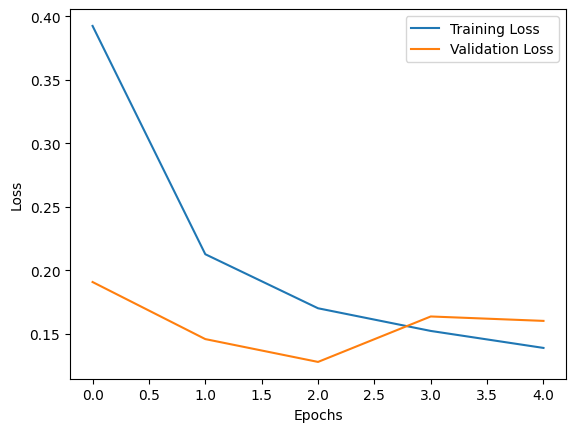

In [ ]:
# Plot the training loss and validation loss versus epochs
history = history_deepCNN
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluating the deep CNN Model:**

In [ ]:
# Evaluating the model on the test data
loss2, accuracy2 = model_deepCNN.evaluate(test_generator)
print("Test Loss:", loss2)
print("Test Accuracy:", accuracy2)

26/26 [==============================] - 47s 2s/step - loss: 0.1828 - accuracy: 0.9373
Test Loss: 0.18279772996902466
Test Accuracy: 0.9372518062591553


**Saving the trained Deep CNN Model:**

In [ ]:
# Saving the VGG16 Trained Model:
# Save the model
model_deepCNN.save('/content/model_deepCNN.h5')

**Loading the trained Deep CNN Model:**

In [ ]:
# Load the saved model
saved_model_deepCNN = load_model('/content/model_deepCNN.h5')

**Saving the History of the trained Deep CNN Model:**

In [ ]:
import pickle

# Save the history object
with open('history_deepCNN.pkl', 'wb') as file:
    pickle.dump(history_deepCNN.history, file)

**Loading the History object of the trained Deep CNN Model:**

In [ ]:
# Reloading the history object
with open('history_deepCNN.pkl', 'rb') as file:
    loaded_history_deepCNN = pickle.load(file)

# Accessing the training and validation metrics
train_loss_deepCNN = loaded_history_deepCNN['loss']
val_loss_deepCNN = loaded_history_deepCNN['val_loss']
train_acc_deepCNN = loaded_history_deepCNN['accuracy']
val_acc_deepCNN = loaded_history_deepCNN['val_accuracy']

**Plottiing the training loss and validation loss versus epochs from loaded_history_deepCNN:**

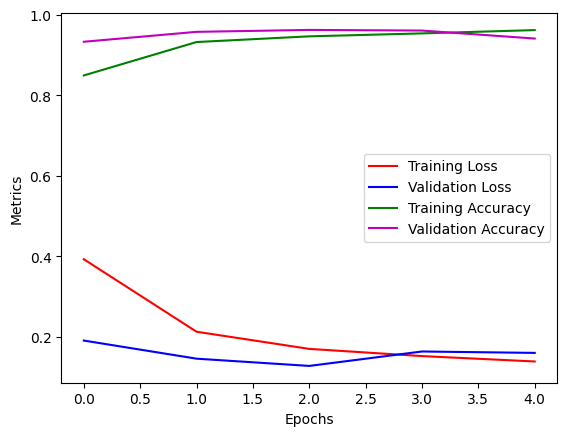

In [ ]:
# Plotting the training and validation metrics
plt.plot(train_loss_deepCNN, 'r', label='Training Loss')
plt.plot(val_loss_deepCNN, 'b', label='Validation Loss')
plt.plot(train_acc_deepCNN, 'g', label='Training Accuracy')
plt.plot(val_acc_deepCNN, 'm', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

**Evaluate the Trained Deep CNN Model using saved_model_deepCNN:**

In [ ]:
# Evaluate the model on the test data
loss_deepCNN, accuracy_deepCNN = saved_model_deepCNN.evaluate(test_generator)
print("CNN Test Loss:", loss_deepCNN)
print("CNN Test Accuracy:", accuracy_deepCNN)

26/26 [==============================] - 46s 2s/step - loss: 0.1756 - accuracy: 0.9349
CNN Test Loss: 0.17564541101455688
CNN Test Accuracy: 0.9348689317703247


## Transfer learning (4 points)

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

**1. Initialize the network with the weights of Imagenet:**

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.applications.vgg16 import VGG16

# Loading the pre-trained VGG16 model with ImageNet weights
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(input_train_shape))

# Freeze the layers of the pre-trained model so they are not updated during training
for layer in vgg16_model.layers:
    layer.trainable = False


**Hyperparameters Tuning:**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid
param_grid = {
    'dense_units': [128, 256, 512],
    'dense_activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001, 0.0001, 0.00001]
}

In [ ]:
# Defining a function to build the model with different hyperparameters
def build_model(dense_units, dense_activation, learning_rate):
    model = Sequential()
    model.add(vgg16_model)
    model.add(Flatten())
    model.add(Dense(dense_units, activation=dense_activation, kernel_initializer="he_normal",
                    kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(Dense(3, activation='softmax'))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create the grid search model
grid_search_v = GridSearchCV(build_model, param_grid, cv=3, scoring='accuracy')

In [ ]:
# Getting the no. of samples in the training set
num_samples = train_generator.samples
# Getting the no. of unique class labels
class_labels = np.unique(train_generator.classes)
# train_labels = class_labels
# Getting the batch size
batch_size = train_generator.batch_size

# Generate the features and labels from the training set
train_features = np.zeros(shape=(num_samples, 7, 7, 512))  # Shape of the output feature maps from VGG16
train_labels = np.zeros(shape=(num_samples, len(class_labels)))

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(input_train_shape))
for layer in vgg16_model.layers:
    layer.trainable = False

# Iterate over the batches of data
i = 0
for inputs_batch, labels_batch in train_generator:
    batch_size = inputs_batch.shape[0]
    features_batch = vgg16_model.predict(inputs_batch)
    train_features[i : i + batch_size] = features_batch
    train_labels[i : i + batch_size] = labels_batch
    i += batch_size
    if i >= num_samples:
        # Break the loop when all samples have been processed
        break

# Reshape the train_features array to match the input shape of the custom fully connected layers
train_features = np.reshape(train_features, (num_samples, 7 * 7 * 512))

1/1 [==============================] - 6s 6s/step


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16

# Function to build the model
def build_model(dense_units=128, dense_activation='relu', learning_rate=0.001):
    vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    model = Sequential()
    model.add(vgg16_model)
    model.add(Flatten())
    model.add(Dense(dense_units, activation=dense_activation))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=build_model, verbose=1)

# Define the hyperparameter grid
param_grid = {
    'dense_units': [128, 256, 512],
    'dense_activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001, 0.0001, 0.00001]
}

# Create the GridSearchCV
grid_search_v = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

<ipython-input-42-b5a150e8e3b3>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=build_model, verbose=1)


In [ ]:
import numpy as np
train_features = np.reshape(train_features, (num_samples, 7, 7, 512))  # Reshape train_features

# Resize train_features to match the expected input shape of the model
train_features = np.repeat(train_features, 32, axis=1)
train_features = np.repeat(train_features, 32, axis=2)

# Verify the shape of train_features
print(train_features.shape)  # (num_samples, 224, 224, 3)

In [ ]:
# Performing grid search
grid_search_v.fit(train_features, train_labels)

In [ ]:
# Getting the best hyperparameters
best_params_v = grid_search_v.best_params_
print("VGG16: Best Hyperparameters:", best_params_v)

**Best Hyperparameters (evaluated):**

---
dense_units = 256,

activation='relu',

kernel_initializer="he_normal",

kernel_regularizer=keras.regularizers.l2(0.01)

learning_rate = 0.00001

In [ ]:
# Building the model with the best hyperparameters
best_model_v = build_model(**best_params_v)

In [ ]:
import numpy as np
from sklearn.utils import class_weight

# Getting the class labels from the generator
class_labels = np.unique(train_generator.classes)
class_counts = np.bincount(train_generator.classes)

# Calculating the class frequencies using the class counts
class_frequencies = class_counts / np.sum(class_counts)

# Calculating the class weights using the inverse of the class frequencies
class_weights = 1 / class_frequencies

# Creating a dictionary mapping class indices to their respective weights
class_weights_dict = dict(zip(class_labels, class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: 3.8863987635239567, 1: 3.1490294301815904, 2: 2.352198316183349}


In [ ]:
#history_v = best_model_v.fit(train_generator, epochs=5, validation_data=valid_generator, class_weight=class_weights_dict)

**2. Fine tune the network by modifying fully connected layers.:**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Creating a new model by adding custom fully connected layers on top of the pre-trained VGG16 model
model_v = Sequential()
model_v.add(vgg16_model)
model_v.add(Flatten())
model_v.add(Dense(256, activation='relu', kernel_initializer="he_normal",
                  kernel_regularizer=keras.regularizers.l2(0.01)))
model_v.add(Dense(3, activation='softmax'))  # Assuming 3 classes: with_mask, without_mask, partial_mask

**2.1 Compiling the Model:**

In [ ]:
# Compiling the model
adam_optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model_v.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

**2.2 Getting Summary of the Model:**

In [ ]:
model_v.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dense_7 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21,138,243
Trainable params: 6,423,555
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
print("Total train_generator classes:",len(train_generator.classes))
print("Unique train_generator Classes:",np.unique(train_generator.classes))

Total train_generator classes: 5029
Unique train_generator Classes: [0 1 2]


**3. Re-train the model with our problem data:**

In [ ]:
import numpy as np
from sklearn.utils import class_weight

# Getting the class labels from the generator
class_labels = np.unique(train_generator.classes)
class_counts = np.bincount(train_generator.classes)

# Calculating the class frequencies using the class counts
class_frequencies = class_counts / np.sum(class_counts)

# Calculating the class weights using the inverse of the class frequencies
class_weights = 1 / class_frequencies

# Creating a dictionary mapping class indices to their respective weights
class_weights_dict = dict(zip(class_labels, class_weights))

# Training the model on our problem data with class weights
history_v = model_v.fit(train_generator, epochs=5, validation_data=valid_generator, class_weight=class_weights_dict)

Epoch 1/5
503/503 [==============================] - 3913s 8s/step - loss: 5.5863 - accuracy: 0.8807 - val_loss: 4.2594 - val_accuracy: 0.9587
Epoch 2/5
503/503 [==============================] - 3915s 8s/step - loss: 4.1900 - accuracy: 0.9559 - val_loss: 3.6076 - val_accuracy: 0.9722
Epoch 3/5
503/503 [==============================] - 3956s 8s/step - loss: 3.5752 - accuracy: 0.9726 - val_loss: 3.1558 - val_accuracy: 0.9778
Epoch 4/5
503/503 [==============================] - 3952s 8s/step - loss: 3.1416 - accuracy: 0.9743 - val_loss: 2.8101 - val_accuracy: 0.9778
Epoch 5/5
503/503 [==============================] - 3964s 8s/step - loss: 2.8146 - accuracy: 0.9751 - val_loss: 2.5349 - val_accuracy: 0.9786


**3.1 Saving the VGG16 Trained Model:**

In [ ]:
# Saving the VGG16 Trained Model:
# Save the model
model_v.save('/content/model_v.h5')

**3.2 Loading the Trained VGG16 Model:**

In [ ]:
# Load the saved model
saved_model_VGG16 = load_model('/content/model_v.h5')

**3.3 Saving the History of VGG16 Trained Model:**

In [ ]:
import pickle

# Save the history object
with open('history_v.pkl', 'wb') as file:
    pickle.dump(history_v.history, file)

**3.4 Loading the History object of VGG16 Trained Model:**

In [ ]:
# Reloading the history object
with open('history_v.pkl', 'rb') as file:
    loaded_history_v = pickle.load(file)

# Accessing the training and validation metrics
train_loss_v = loaded_history_v['loss']
val_loss_v = loaded_history_v['val_loss']
train_acc_v = loaded_history_v['accuracy']
val_acc_v = loaded_history_v['val_accuracy']

**3.5 VGG16 Model: Plotting the training loss and validation loss versus epochs:**

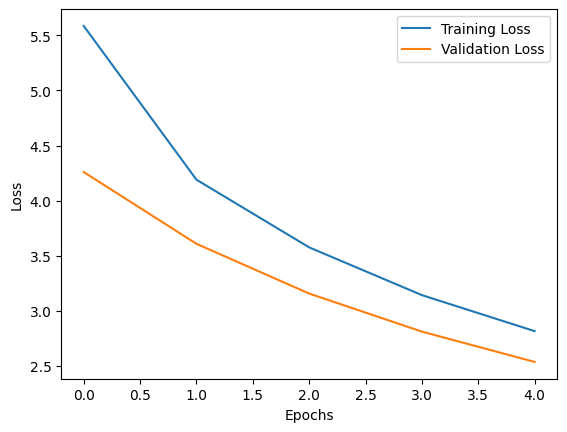

In [ ]:
# Plotting the training loss and validation loss versus epochs
from matplotlib import pyplot as plt
history = history_v
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**4. Evaluate the Trained VGG16 Model:**

In [ ]:
# Evaluate the model on the test data
loss_VGG16, accuracy_VGG16 = saved_model_VGG16.evaluate(test_generator)
print("VGG16 Test Loss:", loss_VGG16)
print("VGG16 Test Accuracy:", accuracy_VGG16)

26/26 [==============================] - 791s 30s/step - loss: 2.5329 - accuracy: 0.9770
VGG16 Test Loss: 2.532851219177246
VGG16 Test Accuracy: 0.9769658446311951


**4.1 Plottiing the training loss and validation loss versus epochs from loaded_history_v:**

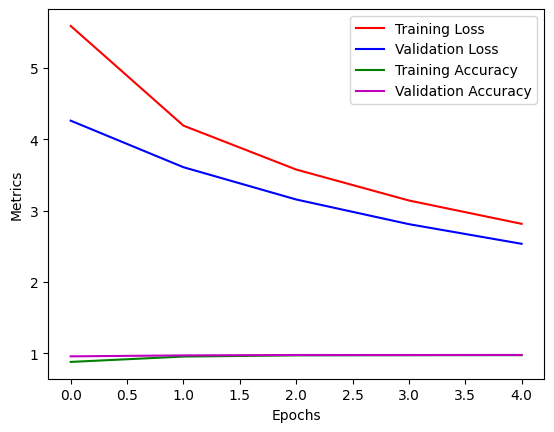

In [ ]:
# Plotting the training and validation metrics
plt.plot(train_loss_v, 'r', label='Training Loss')
plt.plot(val_loss_v, 'b', label='Validation Loss')
plt.plot(train_acc_v, 'g', label='Training Accuracy')
plt.plot(val_acc_v, 'm', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

**1. ResNet50 - Initialize the network with the weights of Imagenet:**

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.applications.resnet50 import ResNet50

# Loading the pre-trained ResNet50 model with ImageNet weights
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(input_train_shape))

# Freeze the layers of the pre-trained model so they are not updated during training
for layer in resnet50_model.layers:
    layer.trainable = False


94765736/94765736 [==============================] - 4s 0us/step


**2. ResNet50 - Fine tune the network by modifying fully connected layers.:**

In [ ]:
# Creating a new model by adding custom fully connected layers on top of the pre-trained ResNet50 model
model_r = Sequential()
model_r.add(resnet50_model)
model_r.add(Flatten())
model_r.add(Dense(256, activation='relu'))
model_r.add(Dense(Num_Unique_Classes, activation='softmax'))  # Assuming 3 classes: with_mask, without_mask, partial_mask

**2.1 ResNet50 - Compiling the Model:**

In [ ]:
# Compiling the model
adam_optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model_r.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

**2.2 ResNet50 - Getting Summary of the Model:**

In [ ]:
model_r.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 256)               25690368  
                                                                 
 dense_9 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49,278,851
Trainable params: 25,691,139
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
print("Total train_generator classes:",len(train_generator.classes))
print("Unique train_generator Classes:",np.unique(train_generator.classes))

Total train_generator classes: 5029
Unique train_generator Classes: [0 1 2]


**3. ResNet50 - Re-train the model with our problem data:**

In [ ]:
import numpy as np
from sklearn.utils import class_weight

# Getting the class labels from the generator
class_labels = np.unique(train_generator.classes)
class_counts = np.bincount(train_generator.classes)

# Calculating the class frequencies using the class counts
class_frequencies = class_counts / np.sum(class_counts)

# Calculating the class weights using the inverse of the class frequencies
class_weights = 1 / class_frequencies

# Creating a dictionary mapping class indices to their respective weights
class_weights_dict = dict(zip(class_labels, class_weights))

# Training the model on our problem data with class weights
history_r = model_r.fit(train_generator, epochs=5, validation_data=valid_generator, class_weight=class_weights_dict)


Epoch 1/5
503/503 [==============================] - 1493s 3s/step - loss: 2.6535 - accuracy: 0.5735 - val_loss: 0.7855 - val_accuracy: 0.6759
Epoch 2/5
503/503 [==============================] - 1520s 3s/step - loss: 2.1567 - accuracy: 0.6832 - val_loss: 0.6707 - val_accuracy: 0.7037
Epoch 3/5
503/503 [==============================] - 1522s 3s/step - loss: 1.9645 - accuracy: 0.7145 - val_loss: 0.5984 - val_accuracy: 0.7609
Epoch 4/5
503/503 [==============================] - 1528s 3s/step - loss: 1.8427 - accuracy: 0.7333 - val_loss: 0.5970 - val_accuracy: 0.7625
Epoch 5/5
503/503 [==============================] - 1523s 3s/step - loss: 1.7254 - accuracy: 0.7612 - val_loss: 0.5284 - val_accuracy: 0.8118


**3.1 Saving the ResNet50 Trained Model:**

In [ ]:
# Saving the ResNet50 Trained Model:
# Save the model
model_r.save('/content/model_r.h5')

**3.2 Loading the Trained ResNet50 Model:**

In [ ]:
# Load the saved model
saved_model_ResNet50 = load_model('/content/model_r.h5')

**3.3 Saving the History of ResNet50 Trained Model:**

In [ ]:
import pickle

# Saving the history object
with open('history_r.pkl', 'wb') as file:
    pickle.dump(history_r.history, file)

**3.4 Loading the History object of ResNet50 Trained Model:**

In [ ]:
# Reloading the history object
with open('history_r.pkl', 'rb') as file:
    loaded_history_r = pickle.load(file)

# Accessing the training and validation metrics
train_loss_r = loaded_history_r['loss']
val_loss_r = loaded_history_r['val_loss']
train_acc_r = loaded_history_r['accuracy']
val_acc_r = loaded_history_r['val_accuracy']

**3.5 ResNet50 Model: Plotting the training loss and validation loss versus epochs:**

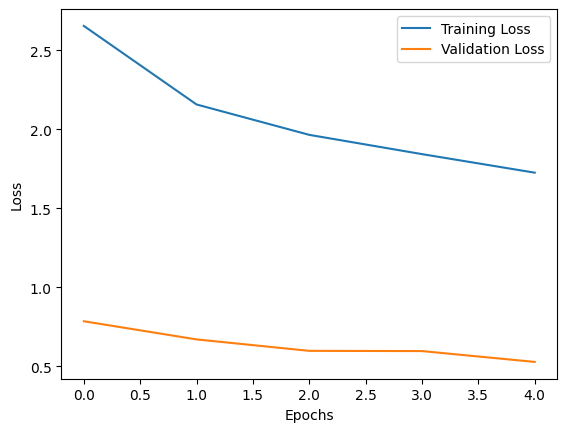

In [ ]:
# Plotting the training loss and validation loss versus epochs
from matplotlib import pyplot as plt
history = history_r
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**4. Evaluate the Trained ResNet50 Model:**

In [ ]:
# Evaluating the model on the test data
loss_ResNet50, accuracy_ResNet50 = saved_model_ResNet50.evaluate(test_generator)
print("ResNet50 Test Loss:", loss_ResNet50)
print("ResNet50 Test Accuracy:", accuracy_ResNet50)

26/26 [==============================] - 295s 11s/step - loss: 0.5325 - accuracy: 0.8125
VGG16 Test Loss: 0.532533586025238
VGG16 Test Accuracy: 0.8125496506690979


**4.1 Plottiing the training loss and validation loss versus epochs from loaded_history_r:**

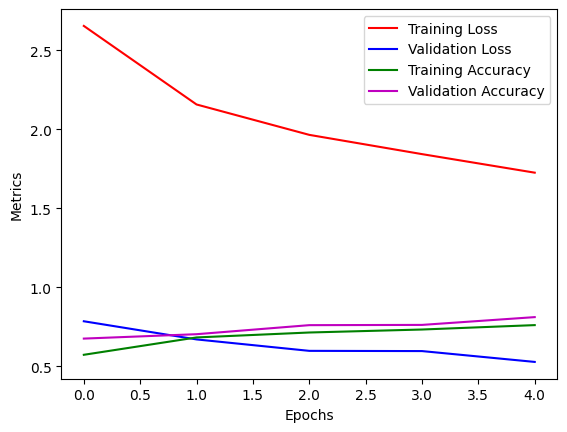

In [ ]:
# Plotting the training and validation metrics
plt.plot(train_loss_r, 'r', label='Training Loss')
plt.plot(val_loss_r, 'b', label='Validation Loss')
plt.plot(train_acc_r, 'g', label='Training Accuracy')
plt.plot(val_acc_r, 'm', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

### Capture the live image using the below code cell and predict

<IPython.core.display.Javascript object>

Saved to photo.jpg


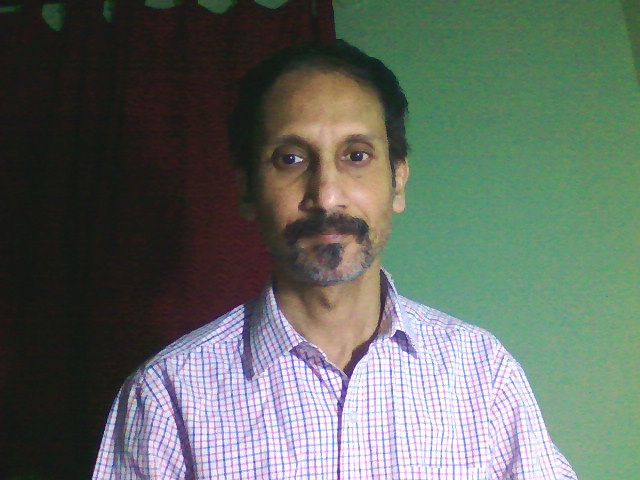

In [ ]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

**Convert the image to numpy array and resize to the shape which model accept:**

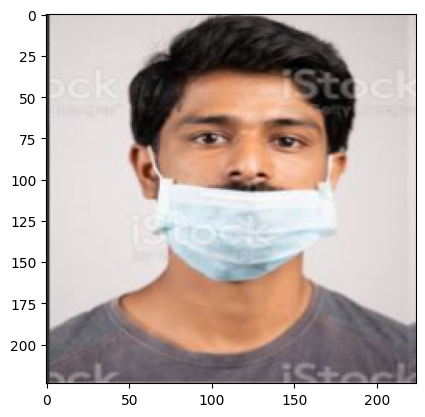

In [ ]:
# features = PIL.Image.open("photo.jpg")
# features = PIL.Image.open("partial_mask_photo.jpg")
# features = PIL.Image.open("without_mask_photo.jpg")
features = PIL.Image.open("/content/partial_mask_photo2.JPG")
plt.imshow(features);

features = features.resize((224, 224))
plt.imshow(features);
# YOUR CODE HERE to predict the image

**Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.**

In [ ]:
features = np.array(features).reshape(1,224,224,3)

**Predicting the Label of live photo using VGG16:**

In [ ]:
model_vgg16_live_capture = saved_model_VGG16
predicted_label = model_vgg16_live_capture.predict(features)
print("Live captured image's Predicted Label: ", predicted_label)
print("train_generator labels:",train_generator.class_indices)
print("argmax of predicted_label ",np.argmax(predicted_label))
list(train_generator.class_indices.keys())[np.argmax(predicted_label)]

1/1 [==============================] - 0s 486ms/step
Live captured image's Predicted Label:  [[1.0000000e+00 0.0000000e+00 8.4783167e-23]]
train_generator labels: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
argmax of predicted_label  0


'partial_mask'

**Predicting the Label of live photo using ResNet50:**

In [ ]:
model_resnet50_live_capture = saved_model_ResNet50
predicted_label = model_resnet50_live_capture.predict(features)
print("Live captured image's Predicted Label: ", predicted_label)
print("train_generator labels:",train_generator.class_indices)
print("argmax of predicted_label ",np.argmax(predicted_label))
list(train_generator.class_indices.keys())[np.argmax(predicted_label)]

1/1 [==============================] - 0s 204ms/step
Live captured image's Predicted Label:  [[2.5164940e-27 2.5048738e-03 9.9749517e-01]]
train_generator labels: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
argmax of predicted_label  2


'without_mask'

### Instructions for preparing Kaggle competition predictions

Important: Refer the [Kaggle Team Creation Instructions Doc](https://docs.google.com/document/d/155aRquDseTmZOJjKrcP0aAv2qdbQlY5l/edit?usp=share_link&ouid=117884344019681793839&rtpof=true&sd=true)

* Load the image paths from Kaggle testset using `glob`
* Read the Images using `PIL.Image.open` and resize to required shape.
* Get the predictions using trained model and prepare a csv file
  - FC layer of DeepNet model gives output for each class, consider the maximum value among all classes as prediction using `np.argmax`.
* Predictions (csv) file should contain 2 columns as Sample_Submission.csv
  - First column is the img_path which is considered as index
  - Second column is prediction in decoded form (for eg. with_mask, partial_mask, without_mask).
  - Note that at the time of submission to Kaggle, predictions need to be sorted in ascending order i.e, same as sample submission file.

<font color='magenta'>If you are unable to download the data and sample submission from the Kaggle Competition site then please use the download cell below.</font>


In [ ]:
#@title Download test data and SampleSubmission file for Kaggle submission
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/FaceMask_Kaggle_test.zip
!unzip -qq FaceMask_Kaggle_test.zip
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Sample_Submission.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


**Embedding the FaceMask_Kaggle_test dataset into a Pandas DataFrame:**

In [ ]:
import pandas as pd
import glob

df = pd.DataFrame()
df['img_path'] = glob.glob("FaceMask_Kaggle_test/*")

orders = []
for pathstr in df['img_path']:
    p = pathstr.split("/")
    q = p[1]
    r = q[:-4]
    orders.append(int(r))

df['order'] = orders
df.sort_values('order',inplace=True)
df.reset_index(inplace=True,drop=True)
df.head()

,img_path,order
0,FaceMask_Kaggle_test/1.jpg,1
1,FaceMask_Kaggle_test/2.jpg,2
2,FaceMask_Kaggle_test/3.jpg,3
3,FaceMask_Kaggle_test/4.jpg,4
4,FaceMask_Kaggle_test/5.jpg,5


In [ ]:
df.iloc[320:340]

,img_path,order
320,FaceMask_Kaggle_test/321.jpg,321
321,FaceMask_Kaggle_test/322.jpg,322
322,FaceMask_Kaggle_test/323.jpg,323
323,FaceMask_Kaggle_test/324.jpg,324
324,FaceMask_Kaggle_test/325.jpg,325
325,FaceMask_Kaggle_test/326.jpg,326
326,FaceMask_Kaggle_test/327.jpg,327
327,FaceMask_Kaggle_test/328.jpg,328
328,FaceMask_Kaggle_test/329.jpg,329
329,FaceMask_Kaggle_test/330.jpg,330


**Extracting the features from Kaggle test dataset:**

In [ ]:
import numpy as np
import os
import PIL
from PIL import Image

kaggle_features = []
for imagepath in df['img_path']:
    X = PIL.Image.open(imagepath)
    X = X.resize((224, 224))
    kaggle_img = np.array(X)
    # Checking if any image in Kaggle test dataset is not complying with (224, 224, 3) dimension
    if kaggle_img.shape != (224,224,3):
        print("This image is not compying with format (224, 224, 3) instead having dim:", kaggle_img.shape)
    kaggle_features.append(kaggle_img)

kaggle_features = np.array(kaggle_features)

**Loading the trained VGG16 model:**

In [ ]:
# Load the saved model
saved_model_VGG16 = load_model('/content/model_v.h5')

**Predicting the Label of Kaggle test image dataset using VGG16:**

In [ ]:
model_vgg16_kaggle_test = saved_model_VGG16
y_pred_kaggle = model_vgg16_kaggle_test.predict(kaggle_features)
print("Kaggle Test images Predicted Label: ", y_pred_kaggle)
print("train_generator labels:",train_generator.class_indices)
print("argmax of predicted_label ",np.argmax(y_pred_kaggle, axis = 1))
#list(train_generator.class_indices.keys())[np.argmax(y_pred_kaggle)]

21/21 [==============================] - 460s 22s/step
Kaggle Test images Predicted Label:  [[9.99983132e-01 2.44271596e-15 1.68401493e-05]
 [2.33982096e-08 9.99999940e-01 1.07028085e-14]
 [1.06959028e-08 9.99999940e-01 3.63221853e-24]
 ...
 [9.88376141e-01 1.04513550e-02 1.17255922e-03]
 [1.26872270e-03 1.44352586e-16 9.98731315e-01]
 [8.03409159e-01 1.96590811e-01 5.94220562e-10]]
train_generator labels: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
argmax of predicted_label  [0 1 1 1 2 0 2 1 0 0 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 0 1 1 0 0 1 0 1 0 0
 2 0 1 1 0 1 1 1 1 1 2 0 1 0 1 1 1 0 1 1 2 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 0 1 2 0 1 0 1 1 1 0 1 1 0 1 2 0 1 0 1 0 1 2 1 0 0 1 1 0 1 1 0
 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 2 1 2 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 2 0 1 0 2 1 0 0 1 0 1 0 0 1 1 1
 2 0 0 1 1 1 1 2 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 2 1 1 0 1 1 2 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 2 1 0 2 0 1 0 2 1 0 2 2

**Generating Sample_Submission.csv file for Kaggle Submission:**

In [ ]:
predicted_labels = np.argmax(y_pred_kaggle, axis = 1)
unique_predicted_labels = set(np.argmax(y_pred_kaggle, axis = 1))
print("unique_predicted_labels:",unique_predicted_labels)

kaggle_submission = pd.DataFrame()

kaggle_submission['img_path'] = df['img_path']

kaggle_submission['label'] = predicted_labels

# Replacing the predicted labels in decoded forms
kaggle_submission['label'].replace(0,'partial_mask',inplace=True)
kaggle_submission['label'].replace(1,'with_mask',inplace=True)
kaggle_submission['label'].replace(2,'without_mask',inplace=True)

unique_predicted_labels: {0, 1, 2}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
kaggle_submission.to_csv("Kaggle_Sample_Submission_3.csv",index=False)

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- Discuss the confusion matrix in terms of the misclassifications

**Compare the accuracies for the Pre-trained vs CNN models:**

1. CNN:

CNN Test Loss: 0.1395464539527893

CNN Test Accuracy: 0.9579030871391296

2. Deep CNN:

Test Loss: 0.18279772996902466

Test Accuracy: 0.9372518062591553

3. VGG16:

VGG16 Test Loss: 0.01687666952610016

VGG16 Test Accuracy: 0.9864972233772278

4. ResNet50:

ResNet50 Test Loss: 0.532533586025238

ResNet50 Test Accuracy: 0.8125496506690979

**What process was followed to tune the hyperparameters?**

We used GridSearchCV to tune the hyperparameters:

dense_units = 256,

dense_activation='relu',

kernel_initializer="he_normal",

kernel_regularizer=keras.regularizers.l2(0.01)

keras.optimizers.Adam(learning_rate=0.00001)

**Which model detects the mask/no mask/ partial mask more accurately with the live pictures?**

For each of the cases with_mask/without_mask/partial_mask, the VGG16 Model is giving best detection. So, under the live picture capture scenario, we can conclude that VGG16 can be considered as the best model to detect with_mask/without_mask/partial_mask more accurately

**Discuss the confusion matrix in terms of the misclassifications**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

saved_model_CNN = load_model('/content/model_CNN.h5')
saved_model_deepCNN = load_model('/content/model_deepCNN.h5')
saved_model_VGG16 = load_model('/content/model_v.h5')
saved_model_ResNet50 = load_model('/content/model_r.h5')

# Getting predictions from each model
predictions_CNN = saved_model_CNN.predict(test_generator)
predictions_deepCNN = saved_model_deepCNN.predict(test_generator)
predictions_VGG16 = saved_model_VGG16.predict(test_generator)
predictions_ResNet50 = saved_model_ResNet50.predict(test_generator)

# Getting true labels
true_labels = test_generator.classes

# Calculating confusion matrices
cm_CNN = confusion_matrix(true_labels, np.argmax(predictions_CNN, axis=1))
cm_deepCNN = confusion_matrix(true_labels, np.argmax(predictions_deepCNN, axis=1))
cm_VGG16 = confusion_matrix(true_labels, np.argmax(predictions_VGG16, axis=1))
cm_ResNet50 = confusion_matrix(true_labels, np.argmax(predictions_ResNet50, axis=1))

# Plotting the confusion matrices
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.imshow(cm_CNN, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CNN Model)')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(222)
plt.imshow(cm_deepCNN, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (DeepCNN Model)')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(223)
plt.imshow(cm_VGG16, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (VGG16 Model)')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(224)
plt.imshow(cm_ResNet50, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (ResNet50 Model)')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()